# K Means Clustering

1. Unsupervised Machine Learning
2. Main goal is to group similar data together
3. Data is unlabelled(No Target Feature)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Read the Dataset

In [2]:
import pandas as pd
df1 = pd.read_csv("Mall_Customers.csv")
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df1.columns = ["Id", "Gender", "Age", "Income", "SpendScore"]
df1

,Id,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   SpendScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df1.isna().sum()

Id            0
Gender        0
Age           0
Income        0
SpendScore    0
dtype: int64

### Visualize Income vs Spending Score

<Axes: xlabel='Income', ylabel='SpendScore'>

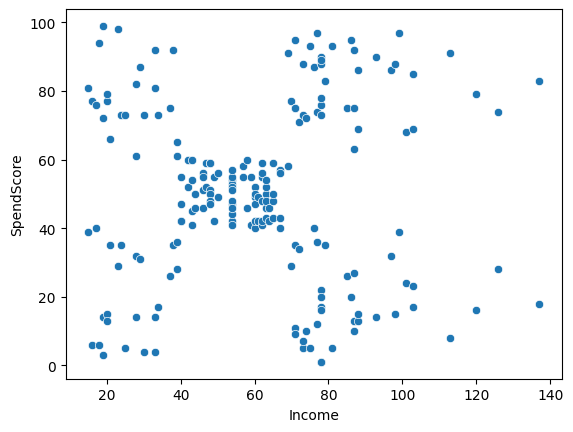

In [6]:
import seaborn as sns
sns.scatterplot(data = df1, x="Income", y="SpendScore")

### Get X Features

In [7]:
X = df1[["Income", "SpendScore"]]
X.head()

,Income,SpendScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Create preprocessing Pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
# Numeric Pipeline

num_pipe = Pipeline(steps= [("imputer", SimpleImputer(strategy="median")),
                            ("scaler", StandardScaler())])

In [10]:
X_pre = num_pipe.fit_transform(X)

X_pre

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Apply Elbow Method to get Optimum number of clusters

In [11]:
%pip install yellowbrick

### Restart and Run all cells

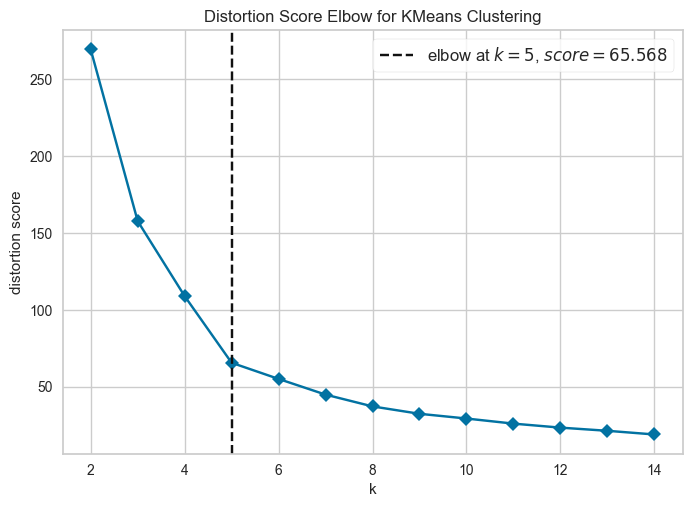

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [12]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
kelbow_visualizer(KMeans(),
                  X_pre,
                  k = (2, 15),
                  timings=False)

### Creating K = 5 Cluster

In [13]:
model = KMeans(n_clusters = 5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [14]:
lb = model.labels_
lb

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [15]:
X['Label'] = lb

In [16]:
X

,Income,SpendScore,Label
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


### Checking different labels

In [17]:
X[X['Label']==0]

,Income,SpendScore,Label
1,15,81,0
3,16,77,0
5,17,76,0
7,18,94,0
9,19,72,0
11,19,99,0
13,20,77,0
15,20,79,0
17,21,66,0
19,23,98,0


In [18]:
X[X['Label']==1]

,Income,SpendScore,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [19]:
X[X['Label']==2]

,Income,SpendScore,Label
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2


In [20]:
X[X['Label']==3]

,Income,SpendScore,Label
0,15,39,3
2,16,6,3
4,17,40,3
6,18,6,3
8,19,3,3
10,19,14,3
12,20,15,3
14,20,13,3
16,21,35,3
18,23,29,3


In [21]:
X[X['Label']==4]

,Income,SpendScore,Label
43,39,61,4
46,40,55,4
47,40,47,4
48,40,42,4
49,40,42,4
...,...,...,...
121,67,40,4
122,69,58,4
126,71,35,4
132,72,34,4


### Visualize the clusters

<Axes: xlabel='Income', ylabel='SpendScore'>

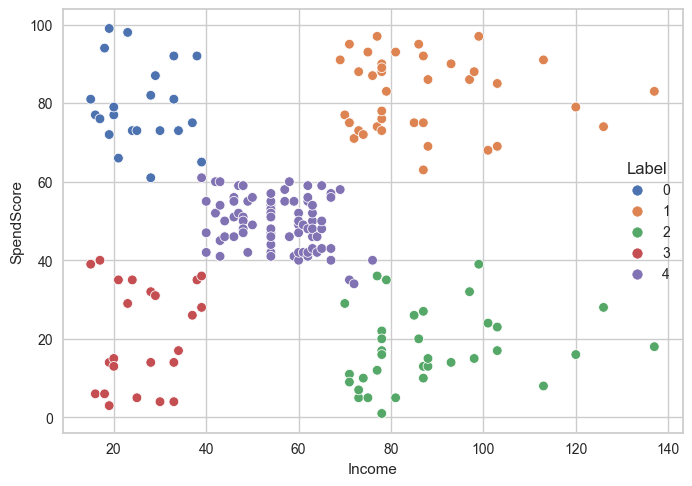

In [22]:
sns.scatterplot(data=X, x='Income', y='SpendScore', hue='Label', palette='deep')

### Clustering on the basis of Age, Income, Spend

In [23]:
X = df1[['Age', 'Income', 'SpendScore']]
X

,Age,Income,SpendScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [24]:
num_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [25]:
X_pre = num_pipe2.fit_transform(X)
X_pre

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

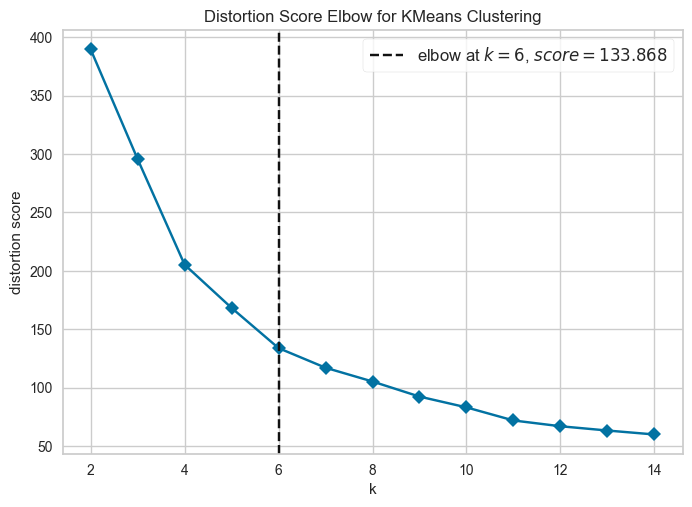

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [26]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

In [27]:
model2 = KMeans(n_clusters=6)
model2.fit(X_pre)

KMeans(n_clusters=6)

In [28]:
lb2 = model2.labels_
lb2

array([5, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 3, 5, 1, 5,
       1, 5, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [29]:
X['Label']=lb2

In [30]:
X

,Age,Income,SpendScore,Label
0,19,15,39,5
1,21,15,81,5
2,20,16,6,1
3,23,16,77,5
4,31,17,40,1
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2


### Visualize the data

In [31]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [32]:
import plotly.express as px
fig = px.scatter_3d(data_frame=X, x="Age", y="Income", z="SpendScore", color="Label")
fig.show()